# **Kernel Density Based Clustering**

*   Rohan Niranjan Kalpavruksha
*   Roshan Niranjan Kalpavruksha

## COMPARING **DBSCAN** WITH **VARIOUS KERNEL's** DENSITY BASED CLUSTERING

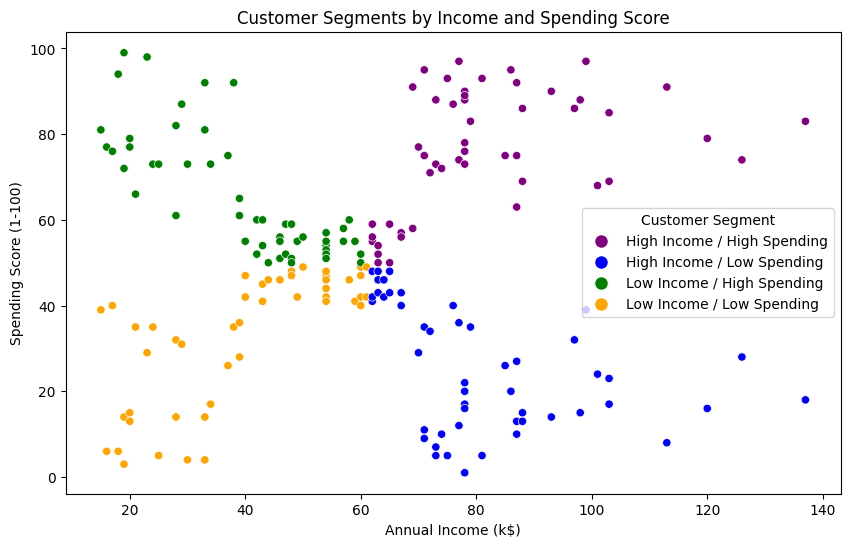

In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

# Load dataset
data = pd.read_csv("Mall_Customers.csv")

# Extract relevant features
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Define threshold values to categorize income and spending into "high" and "low"
income_threshold = X['Annual Income (k$)'].median()
spending_threshold = X['Spending Score (1-100)'].median()

# Define clusters based on high/low income and spending
def categorize_customer(row):
    if row['Annual Income (k$)'] >= income_threshold and row['Spending Score (1-100)'] >= spending_threshold:
        return 'High Income / High Spending'
    elif row['Annual Income (k$)'] >= income_threshold and row['Spending Score (1-100)'] < spending_threshold:
        return 'High Income / Low Spending'
    elif row['Annual Income (k$)'] < income_threshold and row['Spending Score (1-100)'] >= spending_threshold:
        return 'Low Income / High Spending'
    else:
        return 'Low Income / Low Spending'

# Apply the categorization function
data['Segment'] = X.apply(categorize_customer, axis=1)

# Set up color palette for clusters
palette = {
    'High Income / High Spending': 'purple',
    'High Income / Low Spending': 'blue',
    'Low Income / High Spending': 'green',
    'Low Income / Low Spending': 'orange'
}

# Plot to visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=X['Annual Income (k$)'],
    y=X['Spending Score (1-100)'],
    hue=data['Segment'],
    palette=palette
)
plt.title('Customer Segments by Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

# Custom legend
custom_legend = [
    Line2D([0], [0], marker='o', color='w', label='High Income / High Spending',
           markerfacecolor='purple', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='High Income / Low Spending',
           markerfacecolor='blue', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Low Income / High Spending',
           markerfacecolor='green', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Low Income / Low Spending',
           markerfacecolor='orange', markersize=10)
]
plt.legend(handles=custom_legend, title='Customer Segment')
plt.show()

## 1. DBSCAN

Silhouette Score: 0.48


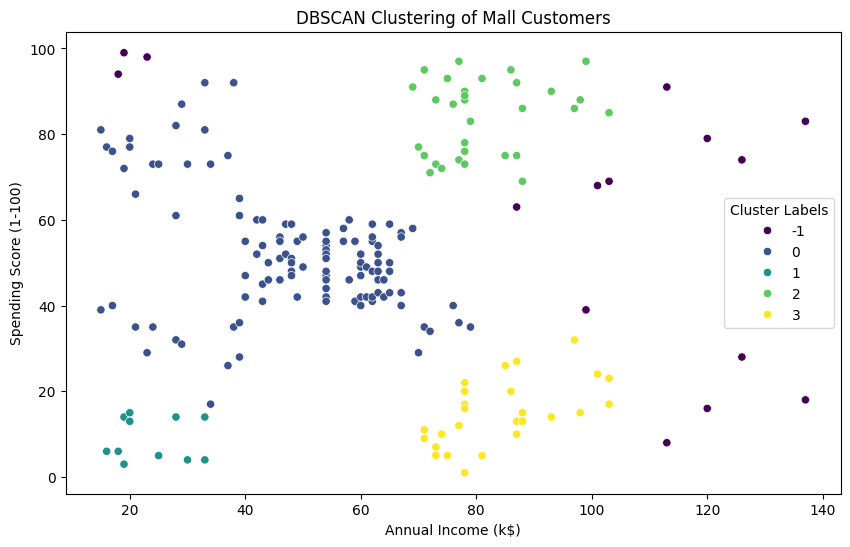

In [12]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Load dataset
data = pd.read_csv("Mall_Customers.csv")

# Extract the last two columns: 'Annual Income (k$)' and 'Spending Score (1-100)'
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Scale data for DBSCAN (DBSCAN is sensitive to scale)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.4, min_samples=5)  # Adjust these parameters as needed
data['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

# Calculate silhouette score for valid clusters (excluding noise labeled as -1)
labels = data['DBSCAN_Cluster']
if len(set(labels)) > 1 and -1 in labels.unique():  # Ensure there are clusters beyond noise
    silhouette_avg = silhouette_score(X_scaled[labels != -1], labels[labels != -1])
    print(f"Silhouette Score: {silhouette_avg:.2f}")
else:
    print("Silhouette score cannot be computed with the given clustering (only noise or one cluster).")

# Visualize the clusters after applying DBSCAN
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=X['Annual Income (k$)'],
    y=X['Spending Score (1-100)'],
    hue=data['DBSCAN_Cluster'],  # Use the correct column here
    palette="viridis",
    legend='full'
)
plt.title('DBSCAN Clustering of Mall Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster Labels')
plt.show()

## 2. VARIOUS KERNEL's DENSITY BASED CLUSTERING


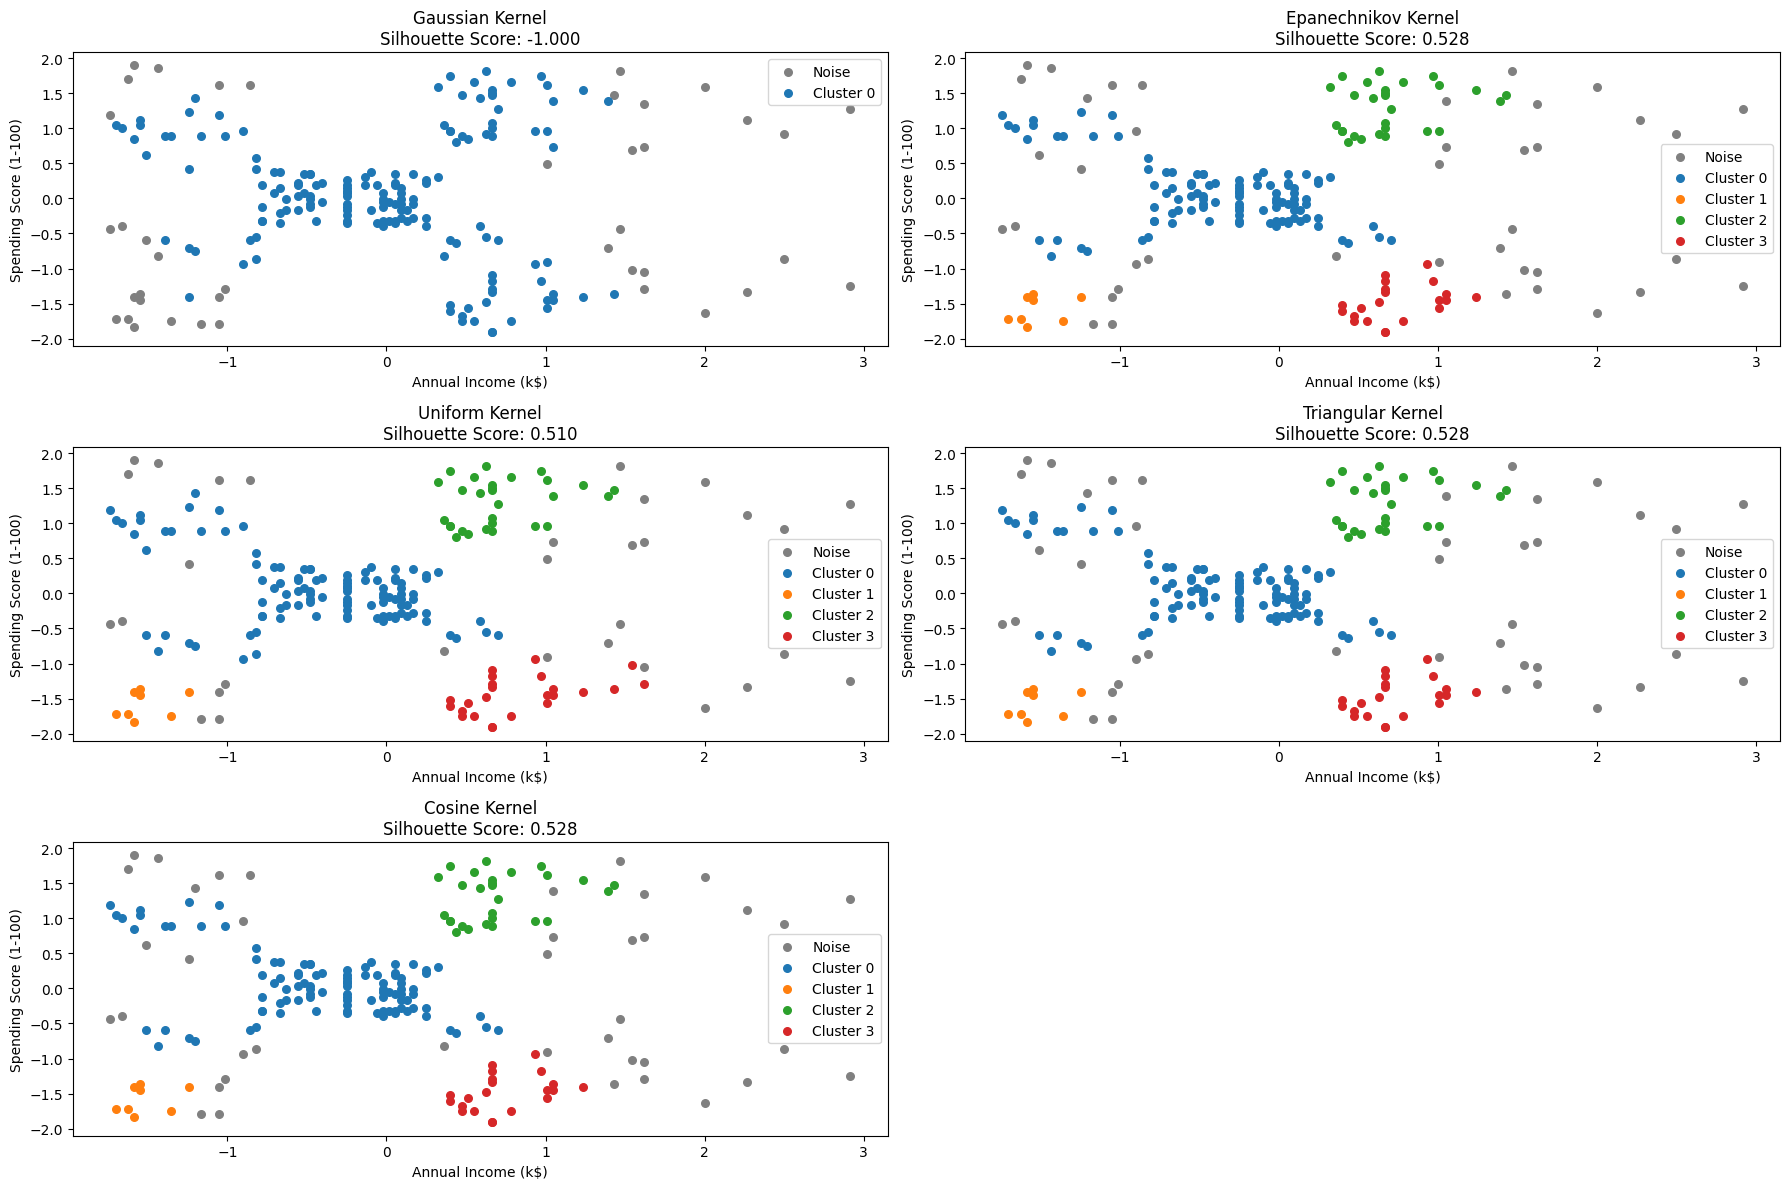

Gaussian Kernel - Silhouette Score: -1.000
Epanechnikov Kernel - Silhouette Score: 0.528
Uniform Kernel - Silhouette Score: 0.510
Triangular Kernel - Silhouette Score: 0.528
Cosine Kernel - Silhouette Score: 0.528


In [11]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Load dataset
data = pd.read_csv("Mall_Customers.csv")

# Extract the relevant features: 'Annual Income (k$)' and 'Spending Score (1-100)'
X = data[['Annual Income (k$)', 'Spending Score (1-100)']].values

# Standardize the data for better results in kernel density estimation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Parameters
N, dim = X_scaled.shape
h = 0.4  # Bandwidth
density_threshold_percentile = 20  # Top 80% as high-density points

# Kernel functions
def gaussian_kernel(distance, bandwidth):
    return (1 / (bandwidth * np.sqrt(2 * np.pi))) * np.exp(-0.5 * (distance / bandwidth) ** 2)

def epanechnikov_kernel(distance, bandwidth):
    u = distance / bandwidth
    return 0.75 * (1 - u**2) if abs(u) <= 1 else 0

def uniform_kernel(distance, bandwidth):
    u = distance / bandwidth
    return 0.5 if abs(u) <= 1 else 0

def triangular_kernel(distance, bandwidth):
    u = distance / bandwidth
    return (1 - abs(u)) if abs(u) <= 1 else 0

def cosine_kernel(distance, bandwidth):
    u = distance / bandwidth
    return (np.pi / 4) * np.cos(np.pi * u / 2) if abs(u) <= 1 else 0

# List of kernels to evaluate
kernels = {
    "Gaussian": gaussian_kernel,
    "Epanechnikov": epanechnikov_kernel,
    "Uniform": uniform_kernel,
    "Triangular": triangular_kernel,
    "Cosine": cosine_kernel,
}

# Function to perform kernel-based clustering
def perform_kernel_clustering(kernel_function):
    # Compute KDE density
    densities = np.zeros(N)
    for i in range(N):
        density_sum = 0
        for j in range(N):
            distance = np.linalg.norm(X_scaled[i] - X_scaled[j])
            density_sum += kernel_function(distance, h)
        densities[i] = density_sum / N

    # Identify high-density points
    density_threshold = np.percentile(densities, density_threshold_percentile)
    high_density_points = np.where(densities >= density_threshold)[0]

    # Initialize cluster labels
    labels = -1 * np.ones(N, dtype=int)  # Noise by default
    cluster_id = 0

    # Cluster high-density points
    for point_idx in high_density_points:
        if labels[point_idx] != -1:  # Already clustered
            continue
        labels[point_idx] = cluster_id
        queue = [point_idx]

        while queue:
            current_point = queue.pop(0)
            for other_idx in high_density_points:
                if labels[other_idx] != -1:  # Skip already labeled points
                    continue
                distance = np.linalg.norm(X_scaled[current_point] - X_scaled[other_idx])
                if kernel_function(distance, h) > 0:
                    labels[other_idx] = cluster_id
                    queue.append(other_idx)

        cluster_id += 1

    # Calculate silhouette score for high-density points only
    high_density_labels = labels[high_density_points]
    if len(set(high_density_labels)) > 1:  # At least 2 clusters
        silhouette = silhouette_score(X_scaled[high_density_points], high_density_labels)
    else:
        silhouette = -1  # Not enough clusters for silhouette

    return labels, silhouette

# Plot results for each kernel
plt.figure(figsize=(18, 12))
results = {}
for i, (kernel_name, kernel_function) in enumerate(kernels.items()):
    labels, silhouette = perform_kernel_clustering(kernel_function)
    results[kernel_name] = silhouette

    # Plot clustering results
    plt.subplot(3, 2, i + 1)
    unique_labels = np.unique(labels)
    for label in unique_labels:
        if label == -1:
            plt.scatter(X_scaled[labels == label, 0], X_scaled[labels == label, 1], s=30, color='gray', label='Noise')
        else:
            plt.scatter(X_scaled[labels == label, 0], X_scaled[labels == label, 1], s=30, label=f'Cluster {label}')

    plt.title(f"{kernel_name} Kernel\nSilhouette Score: {silhouette:.3f}")
    plt.xlabel("Annual Income (k$)")
    plt.ylabel("Spending Score (1-100)")
    plt.legend()

plt.tight_layout()
plt.show()

# Print silhouette scores
for kernel_name, score in results.items():
    print(f"{kernel_name} Kernel - Silhouette Score: {score:.3f}")